<font color=green> Привет еще раз. Спасибо, что доделал работу. Мои комментарии к исправленным замечаниям будут выделены зеленым цветом. Нейтральные комментарии обозначу <font color=orange>оранжевым цветом</font>. Если же потребуется доработка некоторых пунктов проекта, то я отмечу это <font color=red>красным цветом. 
    
---

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Привет! Спасибо, что прислал задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделал большую работу над проектом, однако его еще можно улучшить. Извини за задержку при проверке(

Мои комментарии обозначены пометкой **Комментарий наставника**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно; <font color=orange>оранжевый</font> - есть замечания, но не критично; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Можно также привести краткий план проведения самой работы. 

</div>

ШАГ 1

Мне поручено произвести анализ тарифов компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Я хочу произвести предварительный анализ тарифов на небольшой выборке клиентов. У меня есть данные о 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Я планирую проверить две гипотезы и выяснить, действительно ли они верны или нет.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

#Описание данных

#Таблица users (информация о пользователях):
#user_id — уникальный идентификатор пользователя
#first_name — имя пользователя
#last_name — фамилия пользователя
#age — возраст пользователя (годы)
#reg_date — дата подключения тарифа (день, месяц, год)
#churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
#city — город проживания пользователя
#tarif — название тарифного плана

#Таблица calls (информация о звонках):
#id — уникальный номер звонка
#call_date — дата звонка
#duration — длительность звонка в минутах
#user_id — идентификатор пользователя, сделавшего звонок

#Таблица messages (информация о сообщениях):
#id — уникальный номер сообщения
#message_date — дата сообщения
#user_id — идентификатор пользователя, отправившего сообщение

#Таблица internet (информация об интернет-сессиях):
#id — уникальный номер сессии
#mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
#session_date — дата интернет-сессии
#user_id — идентификатор пользователя

#Таблица tariffs (информация о тарифах):
#tariff_name — название тарифа
#rub_monthly_fee — ежемесячная абонентская плата в рублях
#minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
#messages_included — количество сообщений в месяц, включённых в абонентскую плату
#mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
#rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
#rub_per_message — стоимость отправки сообщения сверх тарифного пакета
#rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Проверим все даты на наличае пропусков и несоответствие форматов:

In [2]:
display(calls.info())
display(calls.head())

calls['duration'] = np.ceil(calls['duration'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Таблицы на печать выводи с помощью метода display. 

</div>

In [3]:
display(internet.info())
display(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [4]:
display(messages.info())
display(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [5]:
display(tariffs.info())
display(tariffs.head())
tariffs['tariff_name'] = tariffs['tariff_name'].astype('str')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
display(users.info())
display(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Пропуски есть только по столбцу, описывающему дату прекращения действия тарифа. Следовательно, тариф ещё действует и им пользуются. Либо, что маловероятно, кто-то ошибся и прислал неполные данные. Поэтому я считаю, что ошибки типа NaN не случайны.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Подумай также о возможных причинах появления ошибок в данных, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицы выполнен.

</div>

In [7]:
users['city'] = users['city']
users['first_name'] = users['first_name']
users['last_name'] = users['last_name']
users['tariff'] = users['tariff']

Изучим данные по длительности звонков и количество использованного интернета за сессию

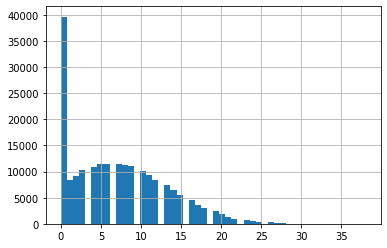

In [8]:
calls['duration'].hist(bins=50)

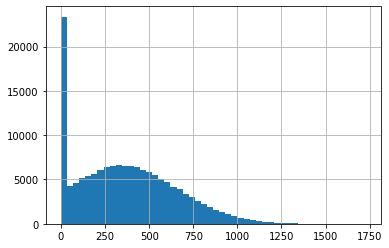

In [9]:
internet['mb_used'].hist(bins=50)

Звонки длительностью в 0 минут никак не оплачиваются, поэтому их можно удалить.
Аналогично удалим 0 значения в данных с мегабайтами.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Исходя из описанной гипотезы звонки с нулевой длительностью, а также интернет-сессии обработаны правильным образом.

</div>

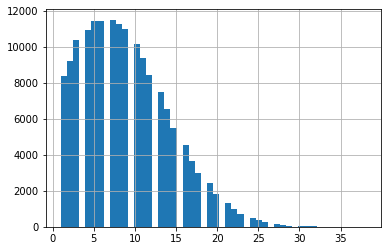

In [10]:
calls = calls.query('duration > 0')
calls['duration'].hist(bins=50)

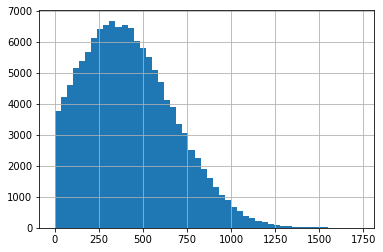

In [11]:
internet = internet.query('mb_used > 0')
internet['mb_used'].hist(bins=50)

Теперь данные в порядке!

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Перед суммированием длительности звонков в течение месяца их стоило округлить вверх до ближайшего целого числа так, как это делает оператор.

</div>

Теперь сделано =) Спасибо, на пару строк кода выше.

ШАГ 2

Добавим месяца в таблицы calls, masseges, internet.

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d %H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d %H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d %H:%M:%S')

In [13]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

Посмотрим все ли нормально:

In [14]:
print('Звонки')
display(calls.head())

Звонки


,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9


In [15]:
print('SMS')
display(messages.head())

SMS


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [16]:
print('Интернет')
display(internet.head())

Интернет


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Ошибки в таблицах исправлены. Данные подготовлены к дальнейшему анализу. 

</div>

Группируем данные по месяцам.

In [17]:
data_pivot_calls = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
data_pivot_masseges = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'])
data_pivot_internet = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
data_pivot_calls.columns = ['calls_sum', 'calls_count']
data_pivot_masseges.columns = ['messages_count']
data_pivot_internet.columns = ['mb_sum']

In [18]:
users_month_pivot = data_pivot_internet.join([data_pivot_masseges, data_pivot_calls])

In [19]:
users_month_pivot['id'] = users_month_pivot.index.get_level_values('user_id')
users_month_pivot['month'] = users_month_pivot.index.get_level_values('month')
users_month_pivot = users_month_pivot.reset_index(drop = True)
users_month_pivot = users_month_pivot.fillna(0)

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Причина появления пропусков высказана. Да, некоторые клиенты не используют все услуги. 

</div>

Пропуски в звонках и смс заменим на 0, так как люди ими не пользовались.

In [20]:
users.set_axis(['id', 
                'age', 
                'churn_date', 
                'city', 
                'first_name', 
                'last_name', 
                'reg_date', 
                'tariff_name'], 
               axis = 'columns', 
               inplace = True)

In [21]:
users_month_pivot = users_month_pivot.merge(users, on='id')
users_month_pivot = users_month_pivot.merge(tariffs, on='tariff_name')

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Показатели расчитаны. Данные подготовлены к дальнейшим расчетам.

</div>

Добавим столбец, где укажем сколько платил пользователь.

In [22]:
def payed(data):
    minuts_over = 0
    gb_over = 0
    message_over = 0
    
    tar_min = data['minutes_included']
    if data['calls_sum'] > tar_min:
        minuts_over = math.ceil(data['calls_sum'] - tar_min)
        
    tar_mess = data['messages_included']
    if data['messages_count'] > tar_mess:
        message_over = math.ceil(data['messages_count'] - tar_mess)
        
    tar_mb = data['mb_per_month_included']
    if data['mb_sum'] > tar_mb:
        gb_over = math.ceil((data['mb_sum'] - tar_mb) / 1024)
        
    summa = (data['rub_monthly_fee'] + minuts_over * data['rub_per_minute'] + message_over * data['rub_per_message'] + gb_over * data['rub_per_gb'])
    return summa

users_month_pivot['payed'] = users_month_pivot.apply(payed, axis=1)

Разбиваем таблицу по тарифам.

In [23]:
users_month_pivot_ultra = users_month_pivot.query('tariff_name == "ultra"')
users_month_pivot_smart = users_month_pivot.query('tariff_name == "smart"')

Тариф SMART

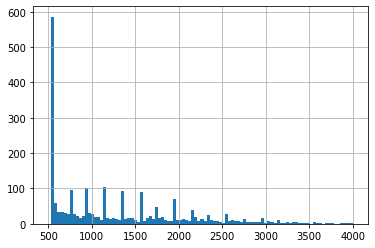

In [24]:
users_month_pivot_smart['payed'].hist(bins=100, range=(500, 4000))

Максимум за месяц человек заплатил 6614. Cуммы выше 4000 рублей уже крайне редки.

In [25]:
users_month_pivot_smart = users_month_pivot_smart.query('payed <= 4000')

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

А зачем убирать данные значения? Да, они редкие, но они приносят компании наибольшую прибыль. 

</div>

Я это воспринял скорее как "шум" в данных и нерелевантное значение, поэтому и убрал. Тем более, эти значения повлияют на общую картину.

<font color=green> С выручкой всегда очень сложно понять, являются ли высокие значения выбросами. Если такие значения встречаются в одном месяце, тогда их можно убрать. Но если клиенты тратят столько на протяжении всего года, то это не выброс. Это вполне реальные данные, которые приносят вдобавок большую выручку. 
    
---

Тариф ULTRA

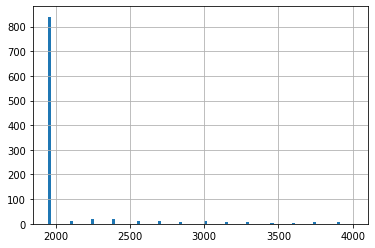

In [26]:
users_month_pivot_ultra['payed'].hist(bins=100, range=(1950, 4000))

Максимум за месяц человек заплатил 4800. Cуммы выше 4000 рублей уже крайне редки.

In [27]:
users_month_pivot_ultra = users_month_pivot_ultra.query('payed < 4000')

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Финальые таблицы получены верным образом. Стоит убрать из них излишнюю информацию в виде имени или фамилии клиента. Такая информация никак не поможет нам в анализе, поэтому хранить ее повторно не стоит. 

</div>

Артём, расскажи, пожалуйста, как убирать лишние столбцы. Нас этому не учили, учили только добавлять =(

In [40]:
users_month_pivot_ultra.drop(columns=['first_name'])

,mb_sum,messages_count,calls_sum,calls_count,id,month,age,churn_date,city,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,payed
0,2253.49,22.0,159.0,17.0,1000,5,52,NaN,Краснодар,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
1,23233.77,60.0,172.0,28.0,1000,6,52,NaN,Краснодар,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
2,14003.64,75.0,340.0,41.0,1000,7,52,NaN,Краснодар,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
3,14055.93,81.0,408.0,42.0,1000,8,52,NaN,Краснодар,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
4,14568.91,57.0,466.0,46.0,1000,9,52,NaN,Краснодар,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,2614.07,13.0,92.0,13.0,1495,8,65,NaN,Иркутск,Фокин,2018-08-28,ultra,1000,30720,3000,1950,150,1,1,1950
970,33067.62,82.0,813.0,95.0,1495,9,65,NaN,Иркутск,Фокин,2018-08-28,ultra,1000,30720,3000,1950,150,1,1,2400
971,29363.00,82.0,1030.0,126.0,1495,10,65,NaN,Иркутск,Фокин,2018-08-28,ultra,1000,30720,3000,1950,150,1,1,1950
972,38939.11,79.0,954.0,112.0,1495,11,65,NaN,Иркутск,Фокин,2018-08-28,ultra,1000,30720,3000,1950,150,1,1,3300


<font color=green> Пример привел выше. Только стоит помнить, что данный метод создает новый датафрейм, не изменяя исходных. Это можно исправить с помощью добавления в качестве параметра inplace=True. Также этого можно добиться переобозначением users_month_pivot_ultra = users_month_pivot_ultra.drop(columns=['first_name']).
    
---

ШАГ 3

Проанализируем клиентов тарифа смарт.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Импорт необходимых библиотек следует произволить в первой ячейке работы, как то рекомендует стандарт. 

</div>

Готово! Спасибо!

Среднее колличество мб в месяц: 16097.33362607515
Медиана мб в месяц: 16458.959999999995
Дисперсия мб в месяц: 32382042.34333629
Стандартное отклонение мб в месяц: 5690.522150324721


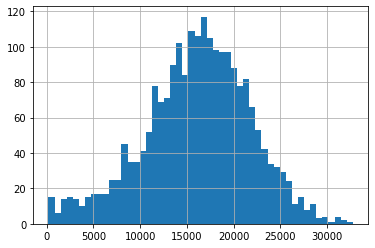

In [28]:
users_month_pivot_smart['mb_sum'].hist(bins=50)
print('Среднее колличество мб в месяц:', users_month_pivot_smart['mb_sum'].mean())
print('Медиана мб в месяц:', users_month_pivot_smart['mb_sum'].median())
print('Дисперсия мб в месяц:', np.var(users_month_pivot_smart['mb_sum']))
print('Стандартное отклонение мб в месяц:', np.sqrt(np.var(users_month_pivot_smart['mb_sum'])))

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Не забывай подписывать оси на графиках, а также делать название всему графику. 

</div>

Датасет с отрицательной скошенностью.

Среднее колличество смс в месяц: 33.3739248528746
Медиана смс в месяц: 28.0
Дисперсия смс в месяц: 789.4898768997399
Стандартное отклонение смс в месяц: 28.097862496989695


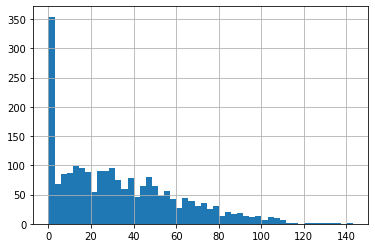

In [29]:
users_month_pivot_smart['messages_count'].hist(bins=50)
print('Среднее колличество смс в месяц:', users_month_pivot_smart['messages_count'].mean())
print('Медиана смс в месяц:', users_month_pivot_smart['messages_count'].median())
print('Дисперсия смс в месяц:', np.var(users_month_pivot_smart['messages_count']))
print('Стандартное отклонение смс в месяц:', np.sqrt(np.var(users_month_pivot_smart['messages_count'])))

Датасет с положительной скошенностью.

Среднее колличество минут в месяц: 415.00452693526483
Медиана минут в месяц: 420.0
Дисперсия минут в месяц: 34693.97553405642
Стандартное отклонение минут в месяц: 186.26318888620054


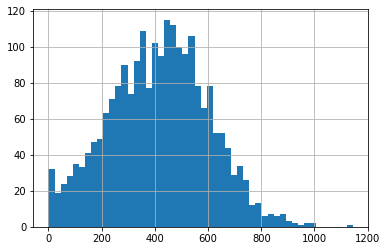

In [30]:
users_month_pivot_smart['calls_sum'].hist(bins=50)
print('Среднее колличество минут в месяц:', users_month_pivot_smart['calls_sum'].mean())
print('Медиана минут в месяц:', users_month_pivot_smart['calls_sum'].median())
print('Дисперсия минут в месяц:', np.var(users_month_pivot_smart['calls_sum']))
print('Стандартное отклонение минут в месяц:', np.sqrt(np.var(users_month_pivot_smart['calls_sum'])))

Датасет с отрицательной скошенностью.

Среднее колличество звонков в месяц: 46.6337709370756
Медиана звонков в месяц: 47.0
Дисперсия звонков в месяц: 424.7128658615185
Стандартное отклонение звонков в месяц: 20.6085629256753


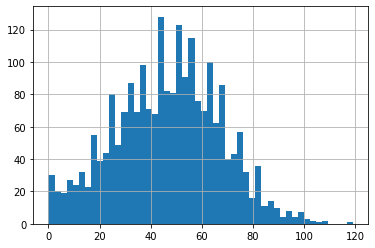

In [31]:
users_month_pivot_smart['calls_count'].hist(bins=50)
print('Среднее колличество звонков в месяц:', users_month_pivot_smart['calls_count'].mean())
print('Медиана звонков в месяц:', users_month_pivot_smart['calls_count'].median())
print('Дисперсия звонков в месяц:', np.var(users_month_pivot_smart['calls_count']))
print('Стандартное отклонение звонков в месяц:', np.sqrt(np.var(users_month_pivot_smart['calls_count'])))

Датасет с отрицательной скошенностью.

Проанализируем клиентов тарифа ультра.

Среднее колличество мб в месяц: 19576.49307216495
Медиана мб в месяц: 19372.68
Дисперсия мб в месяц: 95787558.02647468
Стандартное отклонение мб в месяц: 9787.111832735676


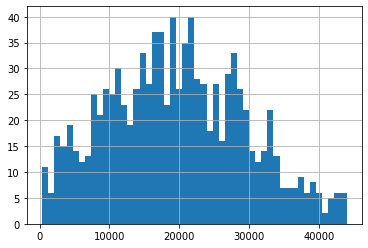

In [32]:
users_month_pivot_ultra['mb_sum'].hist(bins=50)
print('Среднее колличество мб в месяц:', users_month_pivot_ultra['mb_sum'].mean())
print('Медиана мб в месяц:', users_month_pivot_ultra['mb_sum'].median())
print('Дисперсия мб в месяц:', np.var(users_month_pivot_ultra['mb_sum']))
print('Стандартное отклонение мб в месяц:', np.sqrt(np.var(users_month_pivot_ultra['mb_sum'])))

Датасет с положительной скошенностью.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Bins лучше уменьшить. Иначе появляются пики в распределении. 

</div>

Да, ты прав! На 50 лучше смотрится))))

<font color=green> Даже еще немного можно уменьшить. 
    
---

Среднее колличество sms в месяц: 49.53814432989691
Медиана sms в месяц: 38.5
Дисперсия sms в месяц: 2283.90215325752
Стандартное отклонение sms в месяц: 47.79018888074748


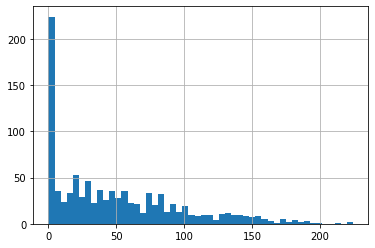

In [33]:
users_month_pivot_ultra['messages_count'].hist(bins=50)
print('Среднее колличество sms в месяц:', users_month_pivot_ultra['messages_count'].mean())
print('Медиана sms в месяц:', users_month_pivot_ultra['messages_count'].median())
print('Дисперсия sms в месяц:', np.var(users_month_pivot_ultra['messages_count']))
print('Стандартное отклонение sms в месяц:', np.sqrt(np.var(users_month_pivot_ultra['messages_count'])))

Датасет с положительной скошенностью.

Среднее колличество минут в месяц: 529.6865979381444
Медиана минут в месяц: 520.5
Дисперсия минут в месяц: 100521.49353172495
Стандартное отклонение минут в месяц: 317.05124748489


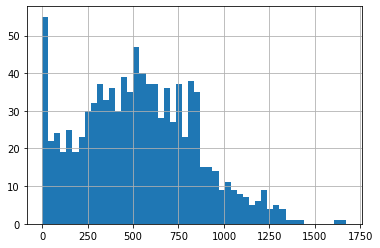

In [34]:
users_month_pivot_ultra['calls_sum'].hist(bins=50)
print('Среднее колличество минут в месяц:', users_month_pivot_ultra['calls_sum'].mean())
print('Медиана минут в месяц:', users_month_pivot_ultra['calls_sum'].median())
print('Дисперсия минут в месяц:', np.var(users_month_pivot_ultra['calls_sum']))
print('Стандартное отклонение минут в месяц:', np.sqrt(np.var(users_month_pivot_ultra['calls_sum'])))

Датасет с положительной скошенностью.

Среднее колличество звонков в месяц: 59.57113402061856
Медиана звонков в месяц: 59.0
Дисперсия звонков в месяц: 1262.269682219152
Стандартное отклонение звонков в месяц: 35.528434840549224


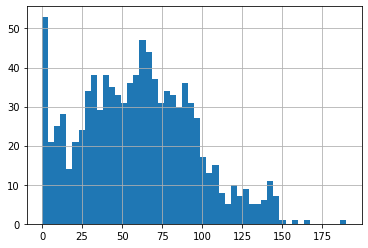

In [35]:
users_month_pivot_ultra['calls_count'].hist(bins=50)
print('Среднее колличество звонков в месяц:', users_month_pivot_ultra['calls_count'].mean())
print('Медиана звонков в месяц:', users_month_pivot_ultra['calls_count'].median())
print('Дисперсия звонков в месяц:', np.var(users_month_pivot_ultra['calls_count']))
print('Стандартное отклонение звонков в месяц:', np.sqrt(np.var(users_month_pivot_ultra['calls_count'])))

Датасет с положительной скошенностью.

СМАРТ: Кроме СМС, у всех датасетов отрицательная скошенность.
УЛЬТРА: Все датасеты с положительной скошенностью.

СЛЕДОВАТЕЛЬНО: Клиенты СМАРТ стараются получить максимум от тарифа. СМС в наше время не так актуальны ввиду мессенджеров и социальных сетей, которые "отбирают" клиентов у СМС. Клиенты тарифа УЛЬТРА не могут воспользоваться полностью своим тарифом. Ну разве что по СМС и минутам.

Как итог, люди берущие СМАРТ часто докупают пакеты минут и ГБ, так как им их не хватает, а люди тарифа УЛЬТРА очень редко пользуются такой опцией.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Базовые статистические параметры получены. Приведены все необходимые графики. Графики для одинаковых услуг тарифов лучше привести на одном рисунке. Так удобнее будет сравнивать тарифы. Также можно привести график по выручке компании с разбиением по тарифу. 

</div>


Попробовал сделать компактнее. Данные становятся нечитаемы, на мой взгляд.

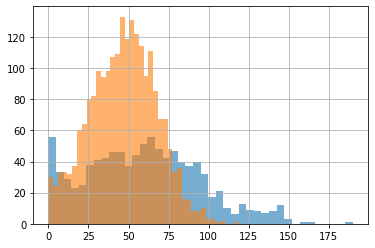

In [44]:
users_month_pivot_ultra['calls_count'].hist(bins=40, alpha=0.6)
users_month_pivot_smart['calls_count'].hist(bins=40, alpha=0.6)

<font color=green> Можно поставить параметр прозначности графиков. Тогда все более менее хорошо видно. 
    
---

ШАГ 4

Проверим гипотезу о том, что средняя сумма денег, которую тратят люди на СМАРТ и УЛЬТРА, равны.

In [36]:
alpha = 0.05

results = st.ttest_ind(
    users_month_pivot_ultra['payed'], 
    users_month_pivot_smart['payed'],
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.5975753981657286e-191
Отвергаем нулевую гипотезу


ВЫВОД: В среднем, клиенты разных тарифов тратят разные суммы денег.

<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

Гипотезы сформулированы и проверены верно. Однако вывод сделан не по проверке гипотезы. Исправь это. 

</div>

<font color=green> Теперь вывод сделан по проведенному тесту.  
    
---

Проверим гипотизу что средняя сумма денег которую тратят люди в Москве и за ее пределами равны.

In [37]:
users_moscow = users_month_pivot.query('city == "Москва"')
users_not_moscow = users_month_pivot.query('city != "Москва"')

In [38]:
alpha = 0.05

results = st.ttest_ind(
    users_moscow['payed'], 
    users_not_moscow['payed'],
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5253724287658383
Не получилось отвергнуть нулевую гипотезу


ВЫВОД: Локация не имеет значения, клиенты платят одинаково.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Вторая гипотеза проверена без нареканий. 

</div>

ОБЩИЙ ВЫВОД:

1) Клиенты СМАРТ используют тариф по максимуму, кроме СМС, ввиду наличия соц.сетей и мессенджеров.
2) Клиенты УЛЬТРА используют СМС и минуты по максимумы, но не остальные услуги.
3) Ввиду этого, клиенты СМАРТ часто берут пакеты Гб и минут сверх тарифа, а клиенты УЛЬТРА крайне редко прибегают к такой опции.
4) Клиенты УЛЬТРА переплачивают за услуги, так как не используют их полностью.
5) Локация не имеет значения, клиенты в среднем платят одинаково.

В ходе проекта, была произведена работа с данными - удалены, на мой взгляд, "шумы" из данных, которые бы повлияли на дальнейший ход анализа. Также было проверено две гипотезы о том, что люди из разных городов платят разные суммы денег и о том, что на разных тарифах в среднем люди платят одинаково.

В качестве рекомендации, могу предложить пересмотр тарифных сеток. По УЛЬТРА часть услуг можно снизить, так как люди их всё равно не используют и им можно продать их в том случае, когда они реально нужны в качестве доп.опции. Клиентам СМАРТ можно предложить единый доп.пакет, который бы включал Гб и минуты, так как это две опции, которые они используют по полной, по скидочной цене. 

Можно также пойти по примеру конкурента, который запустил "биржу", где можно торговать неизрасходованными опциями. 

Также на обоих тарифах можно сократить/убрать СМС, так как ими мало кто пользуется. СМС можно в дальнейшем продавать как доп.опцию, но не пакетом, а в стоимости за штуку, например.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Финальный вывод и есть главный результат твоей работы. Стоит писать его подробнее по результатам проведенной работы. В нем можно приводить полученные в ходе работы значения. Также можно расписать все, что было сделано в работе. Еще лучше будет, если ты приведешь рекомендации для компании по дальнейшим действиям.  

</div>

<font color=green> Помарки исправлены, и теперь работа выполнена хорошо. Успехов в дальнейших проектах :)
    
---

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделал большую работу, молодец! Критических замечаний, кроме вывода из первой гипотезы, нет. Однако есть достаточное число желтых комментариев. Думаю, исправить их тебе не составит труда. Жду твою работу :)

</div>